In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data


In [3]:

df15 =pd.read_csv('Data/2015.csv')
df16 =pd.read_csv('Data/2016.csv')
df17 =pd.read_csv('Data/2017.csv')


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
df15.head() 


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
df17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
df15.shape

(158, 12)

In [8]:
df16.shape

(157, 13)

In [9]:
df17.shape

(155, 12)

In [10]:
df15.size

1896

In [11]:
df16.size

2041

In [12]:
df17.size

1860

In [13]:
df15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [14]:
df16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [15]:
df17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [16]:
df15.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [17]:
df16.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [18]:
df17.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [19]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [20]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [21]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

### Data Quality Checks


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:


In [22]:
# SUSTAINABLE DEVELOPMENT SOLUTIONS NETWORK 

#### 2. Timeliness: 


In [23]:
# UPDATED 4 YEARS AGO (2019)

#### 3. Consistency: 



In [24]:
#It is only from Kaggle that the source is available

#### 4. Relevance: 


In [25]:
df15['Years'] = 2015
df16['Years'] = 2016
df17['Years'] = 2017


In [26]:
df15['Years']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
153    2015
154    2015
155    2015
156    2015
157    2015
Name: Years, Length: 158, dtype: int64

In [27]:
#Unifying column names
df17.rename(columns = {'Happiness.Rank' : 'Happiness Rank',
                        'Happiness.Score' : 'Happiness Score',
                        'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)',
                        'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                        'Dystopia.Residual' : 'Dystopia Residual',
                        'Trust..Government.Corruption.' : 'Trust (Government Corruption)'}, inplace = True)


In [28]:
df=pd.concat(([df15, df16, df17]), ignore_index=True)

In [29]:
df.drop(["Whisker.high"],axis=1,inplace=True)

In [30]:
df.drop(["Whisker.low"],axis=1,inplace=True)

In [31]:
df.drop(["Lower Confidence Interval"],axis=1,inplace=True)
df.drop(["Upper Confidence Interval"],axis=1,inplace=True)
#df.drop(["Region"],axis=1,inplace=True)

In [32]:
df.drop(["Region"],axis=1,inplace=True)

In [33]:
df.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [34]:
 df['Standard Error'].isnull().sum()

312

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Happiness Rank                 470 non-null    int64  
 2   Happiness Score                470 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       470 non-null    float64
 5   Family                         470 non-null    float64
 6   Health (Life Expectancy)       470 non-null    float64
 7   Freedom                        470 non-null    float64
 8   Trust (Government Corruption)  470 non-null    float64
 9   Generosity                     470 non-null    float64
 10  Dystopia Residual              470 non-null    float64
 11  Years                          470 non-null    int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 4

In [36]:
#Number of unique vales
df["Country"].nunique()

166

In [37]:
#Number of duplicate rows
df.duplicated().sum()

0

In [38]:
#Number of duplicate Value
df.duplicated(subset=['Country']).sum() 

304

In [39]:
df.shape

(470, 12)

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [40]:
df.isnull().sum().sort_values(ascending = False)

Standard Error                   312
Country                            0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Years                              0
dtype: int64

In [41]:
#region dic to map it with Dtataframe
country_region = df15[["Country","Region"]]
country_region_dict =dict(zip(country_region["Country"], country_region["Region"]))


In [42]:
df["Region"] = df["Country"].map(country_region_dict)

In [43]:
df[df['Region'].isnull()]

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Region
172,Puerto Rico,15,7.039,NaN,1.359430,1.081130,0.777580,0.468230,0.122750,0.222020,3.007600,2016,NaN
209,Belize,52,5.956,NaN,0.876160,0.686550,0.455690,0.512310,0.107710,0.236840,3.080390,2016,NaN
233,Somalia,76,5.440,NaN,0.000000,0.336130,0.114660,0.567780,0.311800,0.272250,3.837720,2016,NaN
254,Somaliland Region,97,5.057,NaN,0.255580,0.758620,0.331080,0.391300,0.367940,0.514790,2.438010,2016,NaN
270,Namibia,113,4.574,NaN,0.932870,0.703620,0.347450,0.486140,0.103980,0.077950,1.921980,2016,NaN
300,South Sudan,143,3.832,NaN,0.393940,0.185190,0.157810,0.196620,0.130150,0.258990,2.509290,2016,NaN
347,Taiwan Province of China,33,6.422,NaN,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607,2017,NaN
364,Belize,50,5.956,NaN,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2.631956,2017,NaN
385,"Hong Kong S.A.R., China",71,5.472,NaN,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,2017,NaN
407,Somalia,93,5.151,NaN,0.022643,0.721151,0.113989,0.602127,0.282410,0.291631,3.117485,2017,NaN


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [44]:
df.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Region
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,Western Europe
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,Western Europe
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Western Europe
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,Western Europe
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,North America


In [45]:
# The data types are appropriate
df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Years                              int64
Region                            object
dtype: object

In [46]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years
count,470.000000,470.000000,158.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.047885,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2015.993617
std,45.281408,1.136998,0.017146,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.816907
min,1.000000,2.693000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.037268,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.043940,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,0.052300,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,0.136930,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


In [47]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [48]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [49]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [50]:
df.isnull().sum().sort_values(ascending = False)

Standard Error                   312
Region                            12
Country                            0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Years                              0
dtype: int64

In [51]:
df[df['Standard Error'].isnull()]

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Region
158,Denmark,1,7.526,NaN,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2.739390,2016,Western Europe
159,Switzerland,2,7.509,NaN,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2.694630,2016,Western Europe
160,Iceland,3,7.501,NaN,1.426660,1.183260,0.867330,0.566240,0.149750,0.476780,2.831370,2016,Western Europe
161,Norway,4,7.498,NaN,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950,2.664650,2016,Western Europe
162,Finland,5,7.413,NaN,1.405980,1.134640,0.810910,0.571040,0.410040,0.254920,2.825960,2016,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Rwanda,151,3.471,NaN,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017,Sub-Saharan Africa
466,Syria,152,3.462,NaN,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017,Middle East and Northern Africa
467,Tanzania,153,3.349,NaN,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017,Sub-Saharan Africa
468,Burundi,154,2.905,NaN,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017,Sub-Saharan Africa


In [52]:
df['Standard Error'].fillna(0, inplace=True)

In [53]:
df.isnull().sum().sort_values(ascending = False)

Region                           12
Country                           0
Happiness Rank                    0
Happiness Score                   0
Standard Error                    0
Economy (GDP per Capita)          0
Family                            0
Health (Life Expectancy)          0
Freedom                           0
Trust (Government Corruption)     0
Generosity                        0
Dystopia Residual                 0
Years                             0
dtype: int64

In [54]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [55]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [56]:
df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Years                              int64
Region                            object
dtype: object

In [57]:
sorted_df = df.sort_values(by='Happiness Score', ascending =False)

In [58]:
Top10=sorted_df[['Country','Happiness Score']].copy().head(10)


In [59]:
type(Top10)

pandas.core.frame.DataFrame

In [60]:
Top10.reset_index(drop=True)


,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Norway,7.537
3,Denmark,7.527
4,Denmark,7.526
5,Norway,7.522
6,Denmark,7.522
7,Switzerland,7.509
8,Iceland,7.504
9,Iceland,7.501


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

<Figure size 300x600 with 0 Axes>

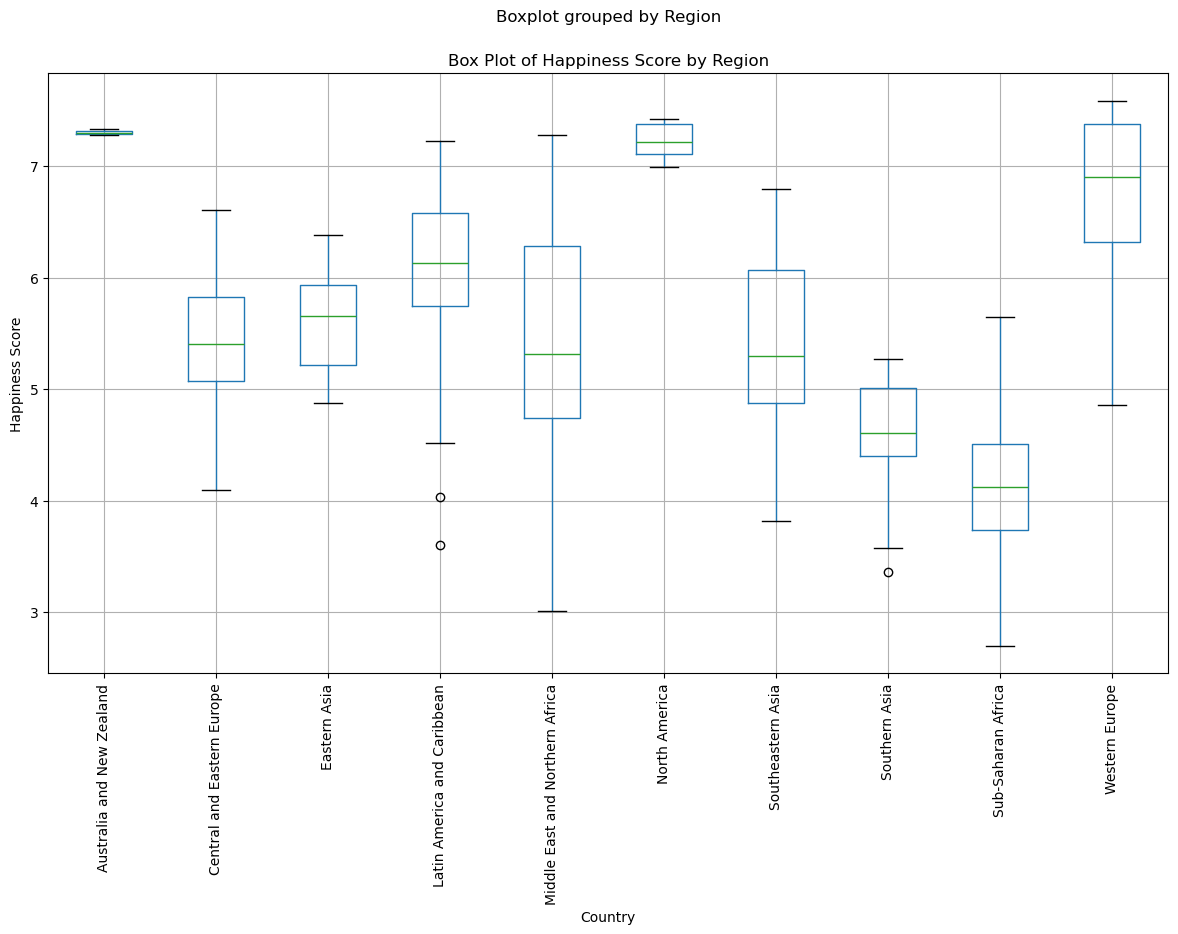

In [61]:
plt.figure(figsize=(3, 6))
df.boxplot(column='Happiness Score', by = 'Region',figsize=(14, 8), rot=90)
plt.title('Box Plot of Happiness Score by Region')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(fontsize=10),plt.grid(True)
plt.show()

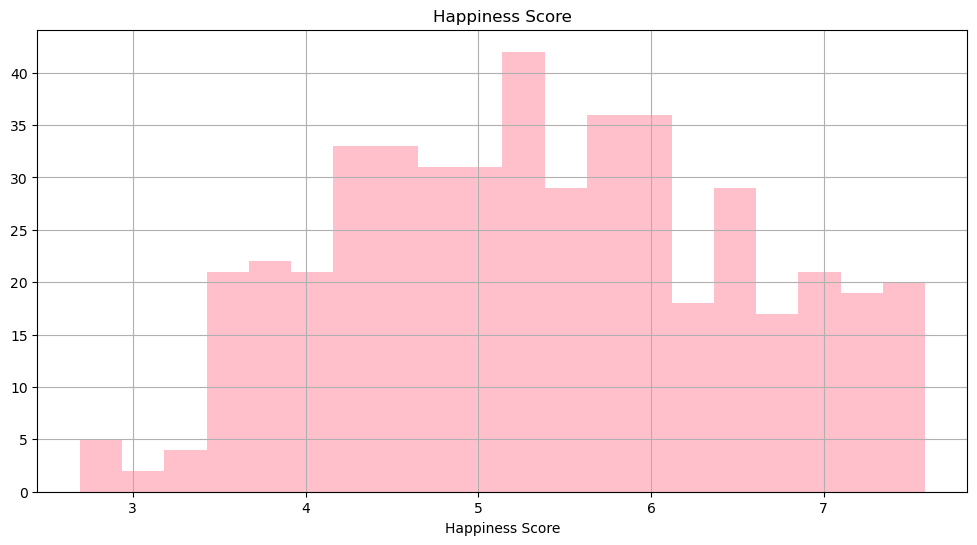

In [62]:
plt.figure(figsize=(12, 6))
plt.hist(df['Happiness Score'], bins=20, color='pink')
plt.title('Happiness Score')
plt.xlabel('Happiness Score')
plt.grid(True)
plt.show()

In [63]:
df.dtypes


Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Years                              int64
Region                            object
dtype: object

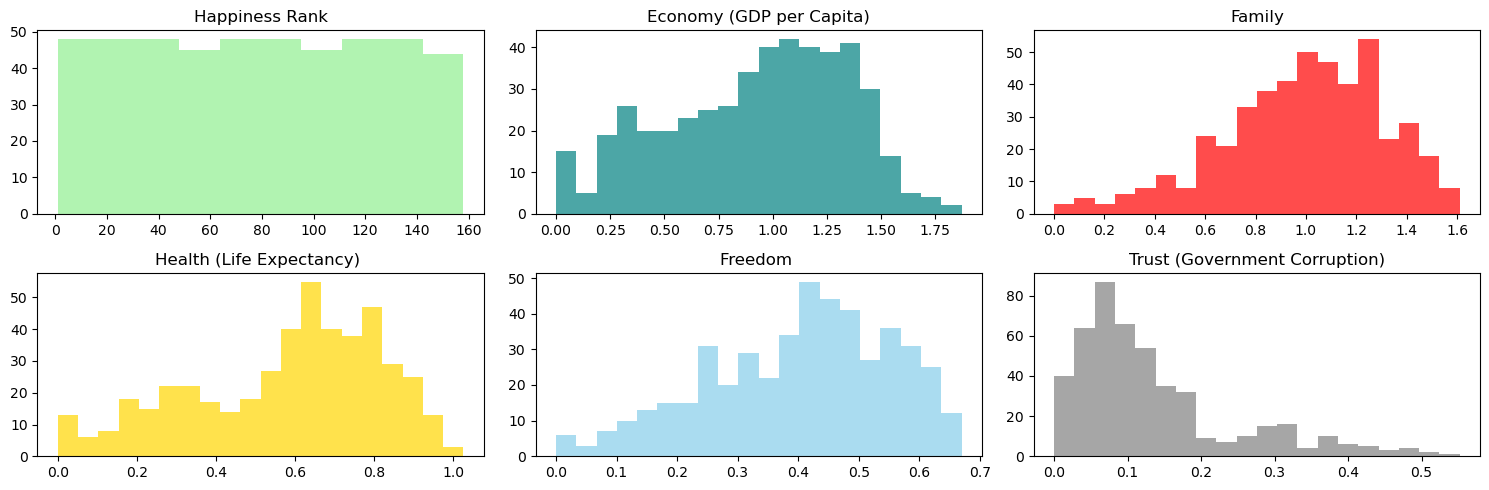

In [64]:
# Create a figure and an array of axes with a subplot for each histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Plot a histogram for each dataset using plt.hist
axes[0][0].hist(df['Happiness Rank'], bins=10, alpha=0.7, color='lightgreen')
axes[0][0].set_title('Happiness Rank')

axes[0][1].hist(df['Economy (GDP per Capita)'], bins=20, alpha=0.7, color='teal')
axes[0][1].set_title('Economy (GDP per Capita)')

axes[0][2].hist(df['Family'], bins=20, alpha=0.7, color='red')
axes[0][2].set_title('Family')

axes[1][0].hist(df['Health (Life Expectancy)'], bins=20, alpha=0.7, color='gold')
axes[1][0].set_title('Health (Life Expectancy) ')

axes[1][1].hist(df['Freedom'], bins=20, alpha=0.7, color='skyblue')
axes[1][1].set_title('Freedom ')

axes[1][2].hist(df['Trust (Government Corruption)'], bins=20, alpha=0.7, color='grey')
axes[1][2].set_title('Trust (Government Corruption)')

# Display the plots
plt.tight_layout()
plt.show()

<Axes: ylabel='Family'>

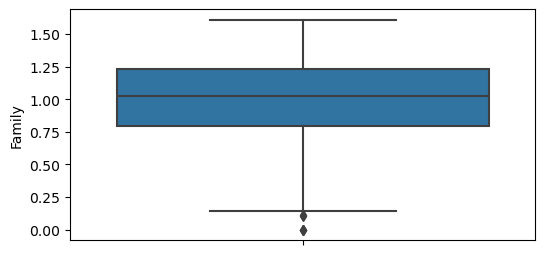

In [65]:
plt.figure(figsize=(6,3))

sns.boxplot(
    df,
    y="Family",
    hue="Happiness Score")

<Axes: ylabel='Dystopia Residual'>

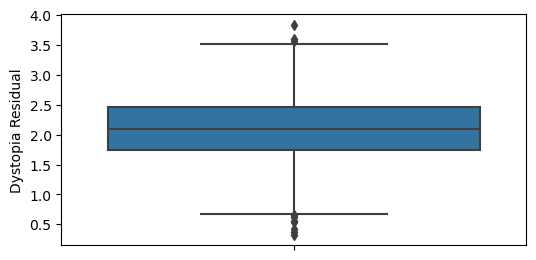

In [66]:
plt.figure(figsize=(6,3))

sns.boxplot(
    df,
    y="Dystopia Residual",
    hue="Happiness Score")

<Axes: ylabel='Generosity'>

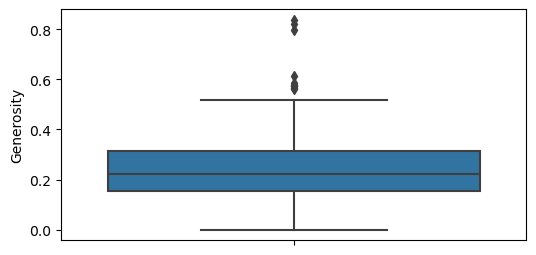

In [67]:
plt.figure(figsize=(6,3))

sns.boxplot(
    df,
    y="Generosity",
    hue="Happiness Rank")

<Axes: ylabel='Trust (Government Corruption)'>

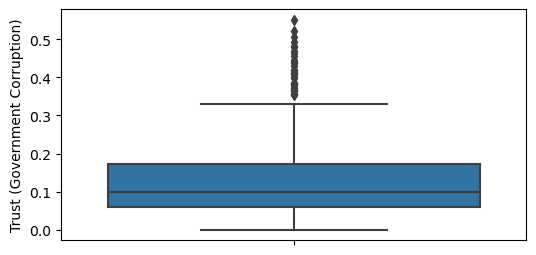

In [68]:
plt.figure(figsize=(6,3))

sns.boxplot(
    df,
    y="Trust (Government Corruption)",
    hue="Happiness Rank")

<Axes: ylabel='Economy (GDP per Capita)'>

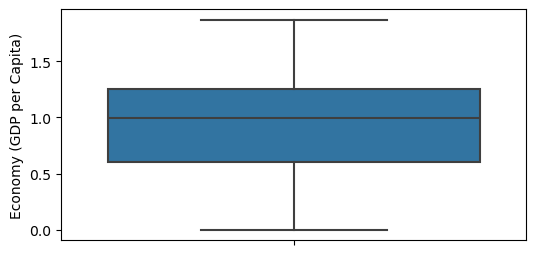

In [69]:
plt.figure(figsize=(6,3))

sns.boxplot(
    df,
    y="Economy (GDP per Capita)",
    hue="Happiness Rank")

<Axes: ylabel='Freedom'>

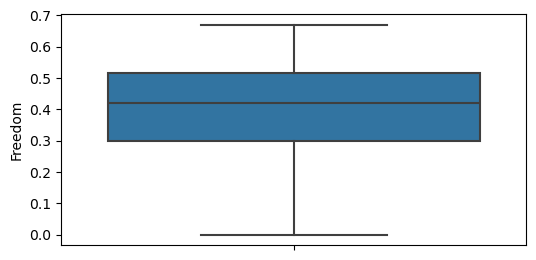

In [70]:
plt.figure(figsize=(6,3))

sns.boxplot(
    df,
    y="Freedom",
    hue="Happiness Rank")

<Axes: ylabel='Health (Life Expectancy)'>

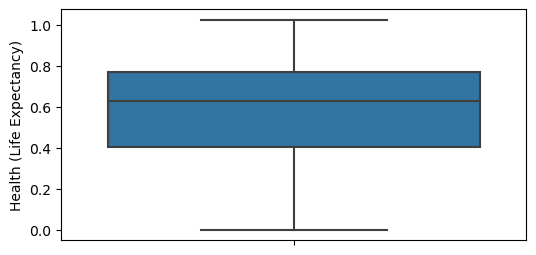

In [71]:
plt.figure(figsize=(6,3))

sns.boxplot(
    df,
    y="Health (Life Expectancy)",
    hue="Happiness Rank")

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [72]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.016097,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2015.993617
std,45.281408,1.136998,0.024722,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.816907
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.000000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.000000,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,0.037282,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,0.136930,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


In [73]:
Q1=df['Family'].quantile(0.25)
Q3=df['Family'].quantile(0.75)
Q1, Q3

(0.793, 1.2287450924301175)

In [74]:
IQR = Q3 - Q1
IQR

0.4357450924301175

In [75]:
lower_limit= Q1 - 1.5 * IQR
upper_limit= Q3 + 1.5 * IQR
lower_limit ,upper_limit

(0.13938236135482385, 1.8823627310752937)

In [76]:
# Outlier 1
df[(df['Family'] < lower_limit) | (df['Family'] > upper_limit)]

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Region
147,Central African Republic,148,3.678,0.06112,0.07850,0.00000,0.066990,0.488790,0.082890,0.238350,2.722300,2015,Sub-Saharan Africa
310,Benin,153,3.484,0.00000,0.39499,0.10419,0.210280,0.397470,0.066810,0.201800,2.108120,2016,Sub-Saharan Africa
311,Afghanistan,154,3.360,0.00000,0.38227,0.11037,0.173440,0.164300,0.071120,0.312680,2.145580,2016,Southern Asia
312,Togo,155,3.303,0.00000,0.28123,0.00000,0.248110,0.346780,0.115870,0.175170,2.135400,2016,Sub-Saharan Africa
469,Central African Republic,155,2.693,0.00000,0.00000,0.00000,0.018773,0.270842,0.056565,0.280876,2.066005,2017,Sub-Saharan Africa


In [77]:
Q1=df['Dystopia Residual'].quantile(0.25)
Q3=df['Dystopia Residual'].quantile(0.75)
IQR = Q3 - Q1
lower_limit= Q1 - 1.5 * IQR
upper_limit= Q3 + 1.5 * IQR

In [78]:
# Outlier 2
df[(df['Dystopia Residual'] < lower_limit) | (df['Dystopia Residual'] > upper_limit)]

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Region
13,Mexico,14,7.187,0.04176,1.020540,0.914510,0.814440,0.481810,0.213120,0.140740,3.602140,2015,Latin America and Caribbean
71,Hong Kong,72,5.474,0.05051,1.386040,1.058180,1.013280,0.596080,0.371240,0.394780,0.654290,2015,Eastern Asia
155,Syria,156,3.006,0.05015,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790,0.328580,2015,Middle East and Northern Africa
178,Mexico,21,6.778,0.00000,1.115080,0.714600,0.711430,0.377090,0.183550,0.117350,3.559060,2016,Latin America and Caribbean
233,Somalia,76,5.440,0.00000,0.000000,0.336130,0.114660,0.567780,0.311800,0.272250,3.837720,2016,NaN
385,"Hong Kong S.A.R., China",71,5.472,0.00000,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,2017,NaN
434,Sri Lanka,120,4.440,0.00000,1.009850,1.259976,0.625131,0.561213,0.073654,0.490864,0.419389,2017,Southern Asia
456,Botswana,142,3.766,0.00000,1.122094,1.221555,0.341756,0.505196,0.098583,0.099348,0.377914,2017,Sub-Saharan Africa
465,Rwanda,151,3.471,0.00000,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017,Sub-Saharan Africa
467,Tanzania,153,3.349,0.00000,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017,Sub-Saharan Africa


In [79]:
# Extract outliers using z-score 3
z_scores = np.abs(zscore(df['Trust (Government Corruption)']))

df[np.abs(z_scores) > 3]

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Region
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Western Europe
23,Singapore,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501,2015,Southeastern Asia
27,Qatar,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674,2015,Middle East and Northern Africa
153,Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015,Sub-Saharan Africa
179,Singapore,22,6.739,0.00000,1.64555,0.86758,0.94719,0.48770,0.46987,0.32706,1.99375,2016,Southeastern Asia
193,Qatar,36,6.375,0.00000,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224,2016,Middle East and Northern Africa
309,Rwanda,152,3.515,0.00000,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,2016,Sub-Saharan Africa


In [80]:
# Extract outliers using z-score 4
z_scores = np.abs(zscore(df['Generosity']))

df[np.abs(z_scores) > 3]

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Region
128,Myanmar,129,4.307,0.04351,0.271080,0.709050,0.482460,0.440170,0.190340,0.795880,1.41805,2015,Southeastern Asia
276,Myanmar,119,4.395,0.00000,0.341120,0.699810,0.398800,0.426920,0.202430,0.819710,1.50655,2016,Southeastern Asia
428,Myanmar,114,4.545,0.00000,0.367111,1.123236,0.397523,0.514492,0.188816,0.838075,1.11529,2017,Southeastern Asia


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

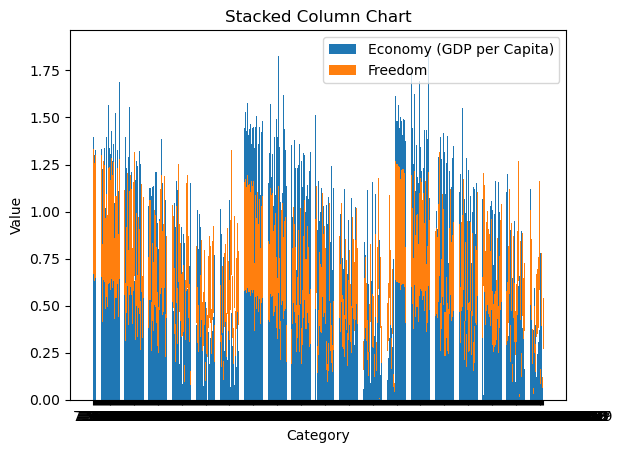

In [91]:
positions = range(len(df))

# Plot the stacked bar chart
plt.bar(positions, df['Economy (GDP per Capita)'], label='Economy (GDP per Capita)')
plt.bar(positions, df['Freedom'], bottom=df['Freedom'], label='Freedom')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Stacked Column Chart')
plt.xticks(positions, df['Happiness Score'])
plt.legend()

# Show the plot
plt.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

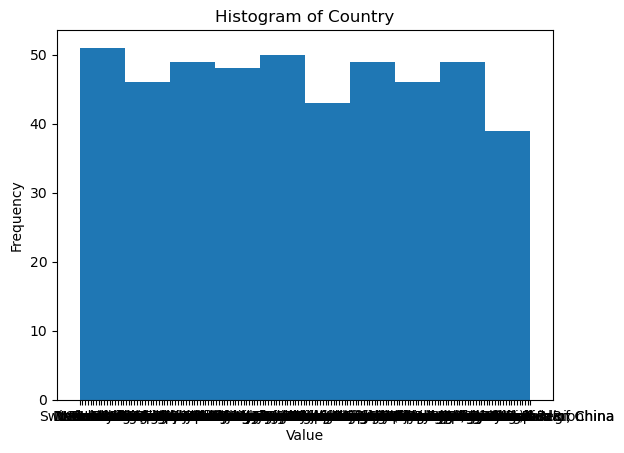

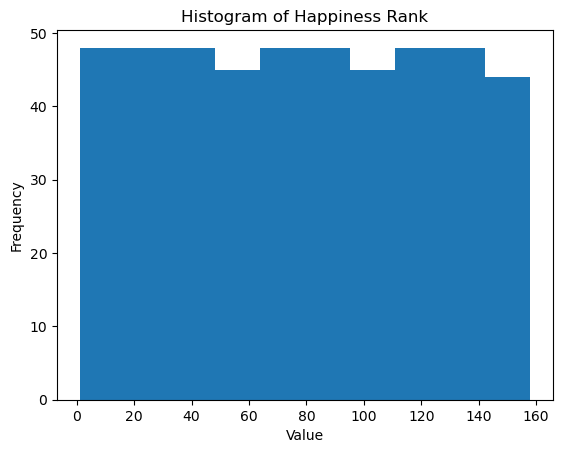

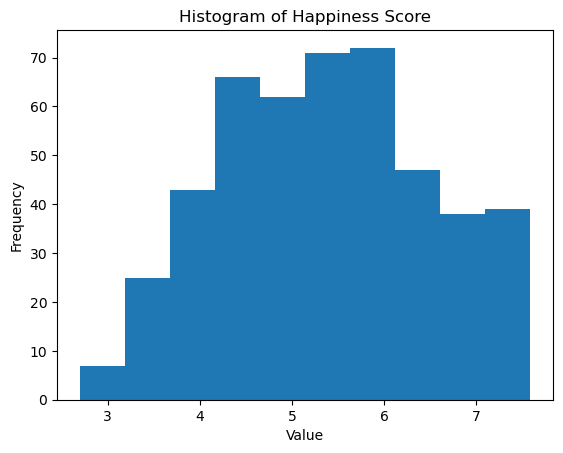

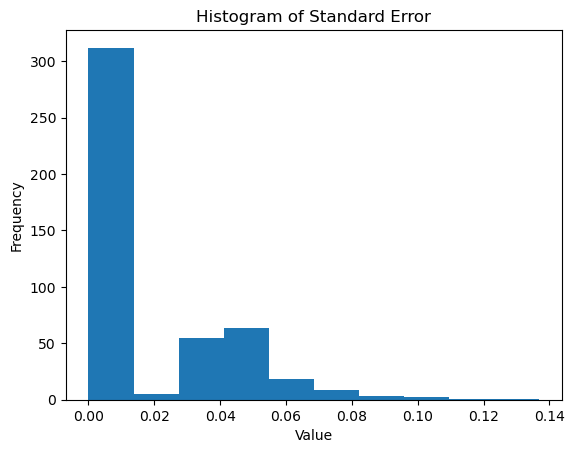

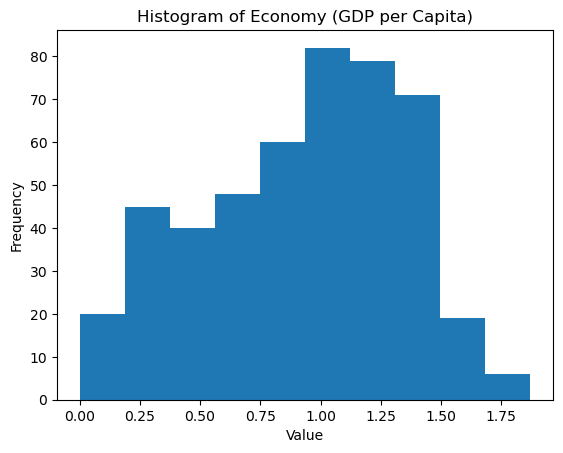

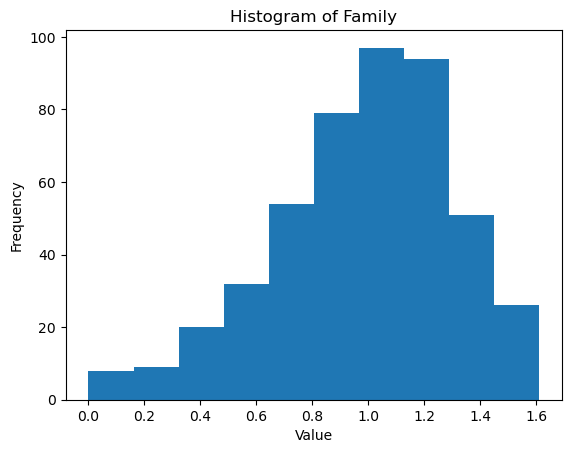

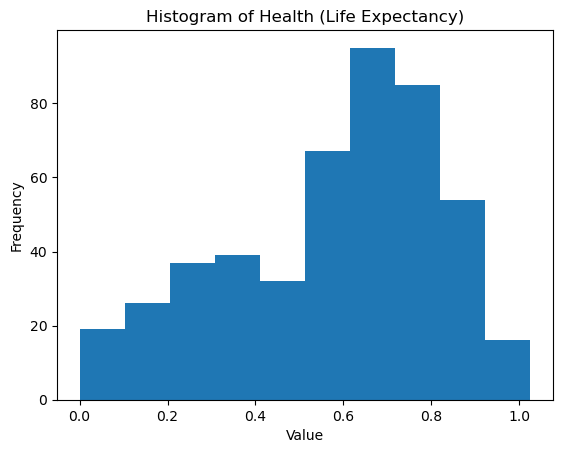

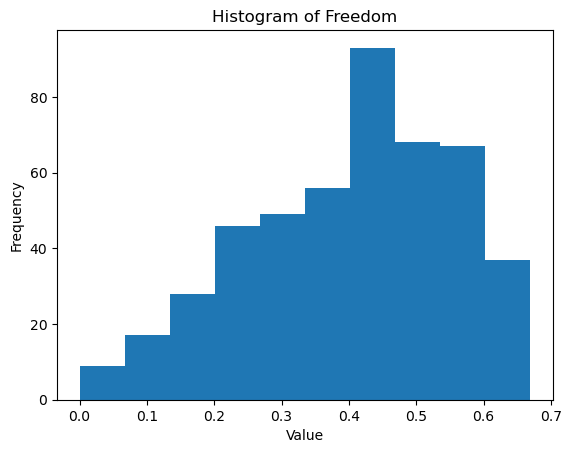

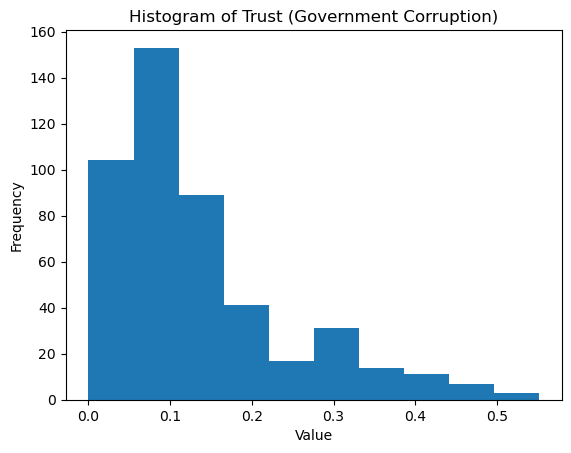

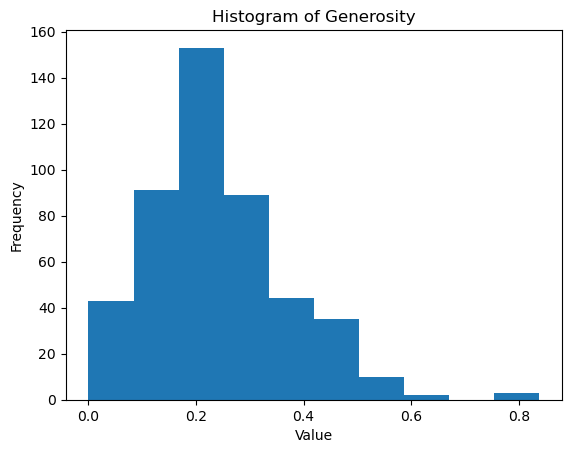

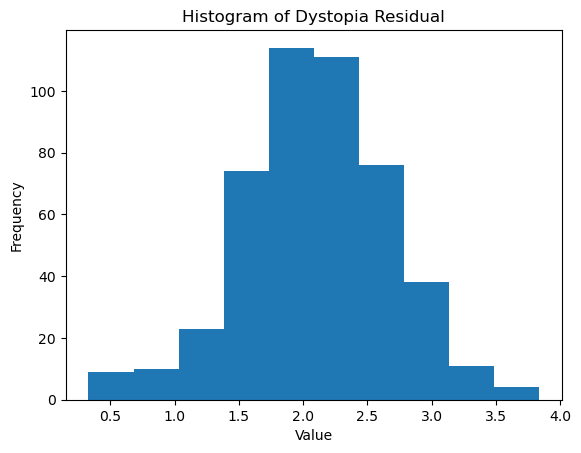

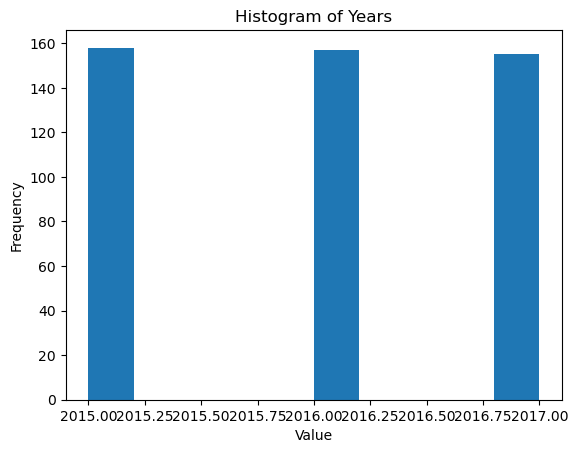

TypeError: 'value' must be an instance of str or bytes, not a float

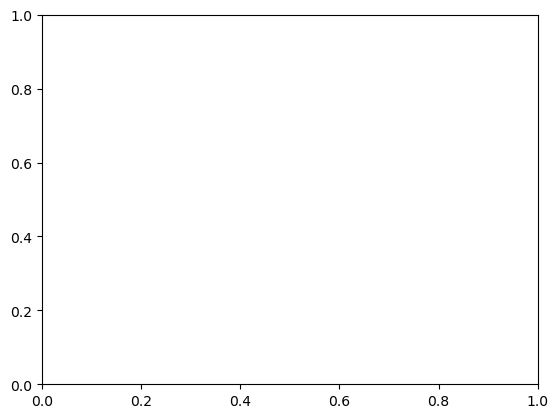

In [110]:
for column in df.columns:
    plt.hist(df[column], bins=10)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

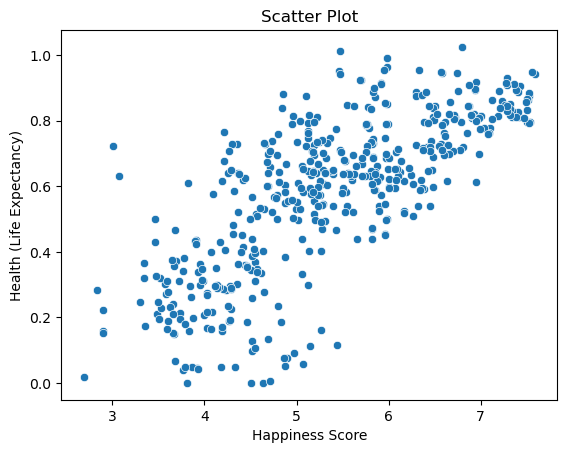

In [112]:
sns.scatterplot(data=df, x='Happiness Score', y='Health (Life Expectancy)')
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.title('Scatter Plot')
plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

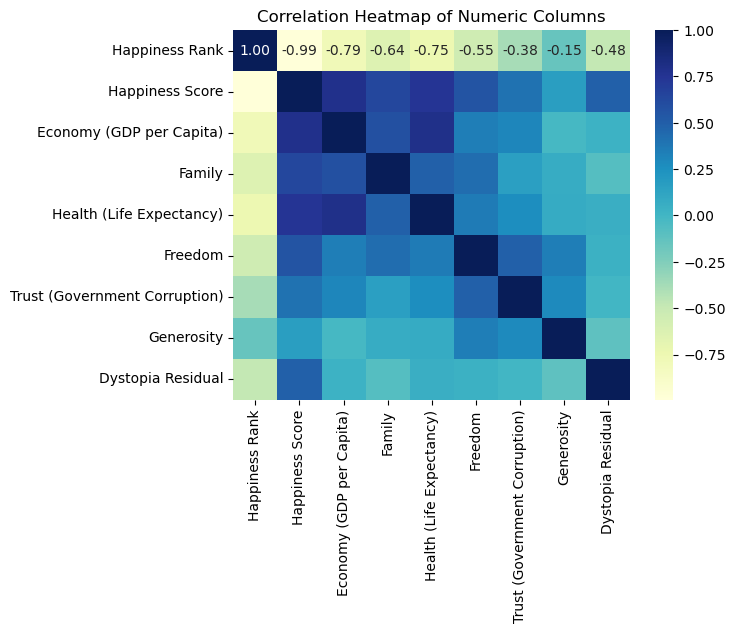

In [96]:
numeric_cols = ['Happiness Rank', 'Happiness Score', 
                'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                'Freedom', 'Trust (Government Corruption)', 'Generosity', 
                'Dystopia Residual']

numeric_df = df[numeric_cols]

# Create the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

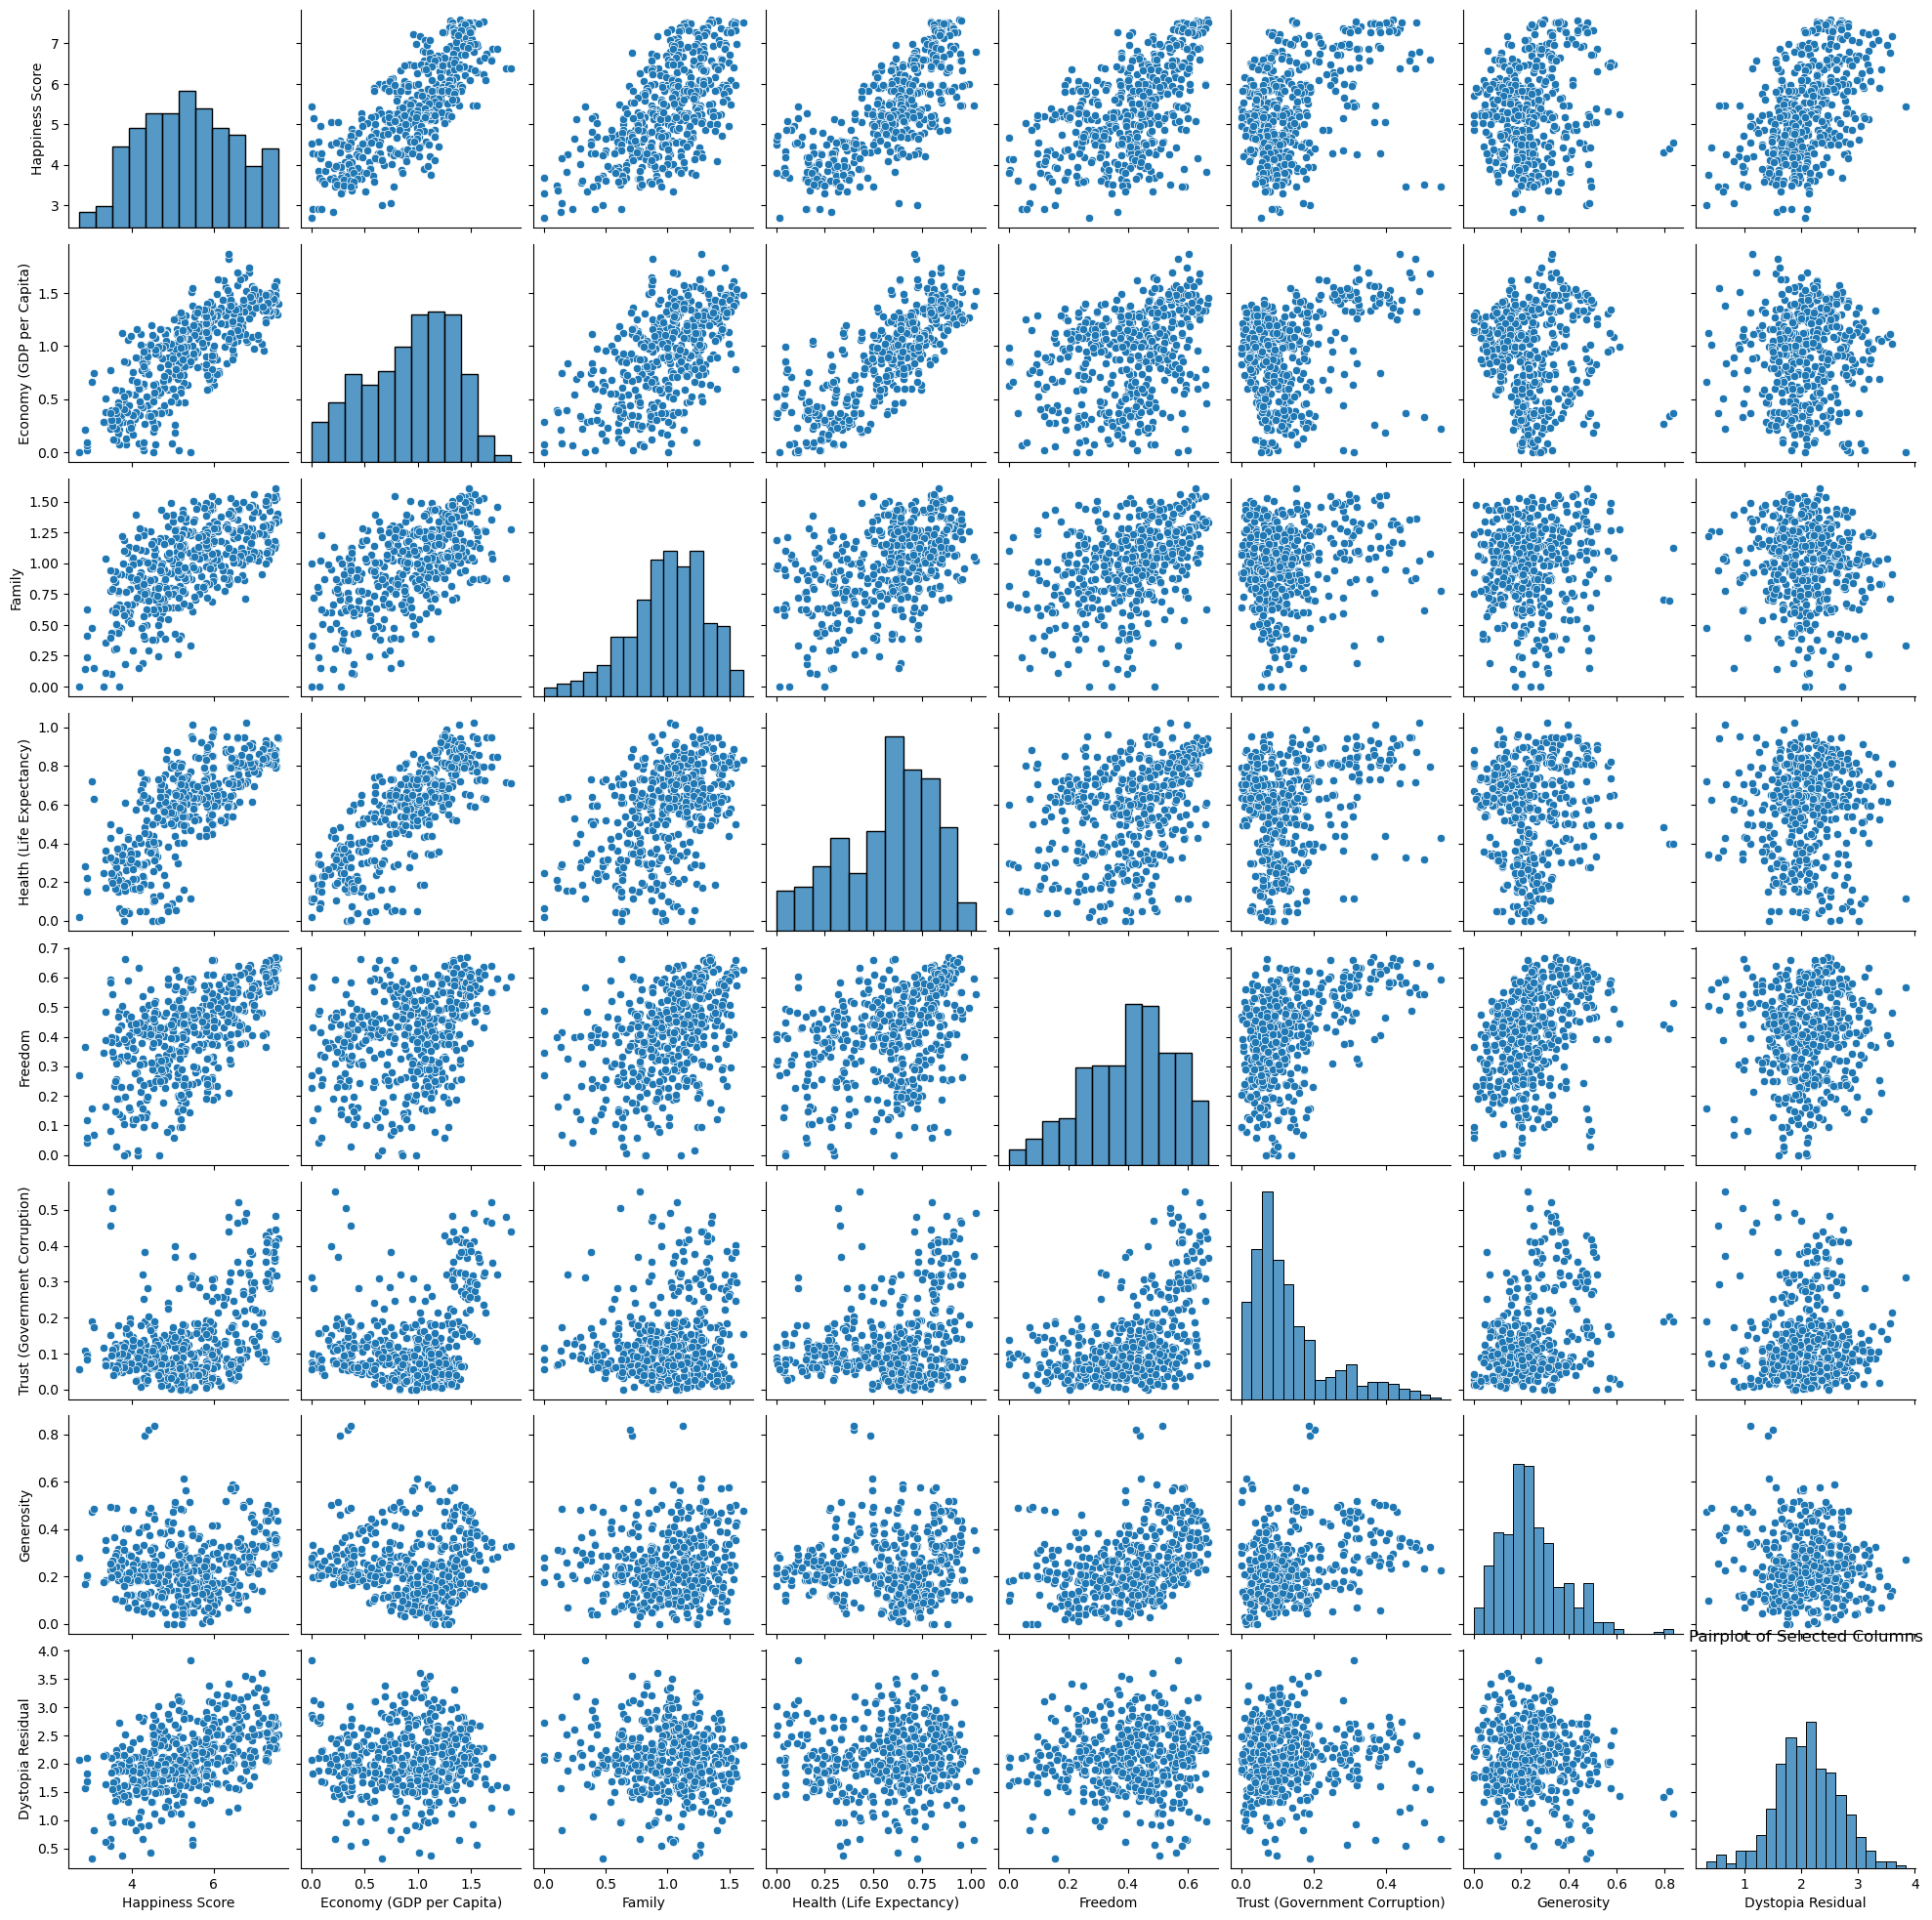

In [109]:

selected_columns = ['Happiness Score', 
                'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                'Freedom', 'Trust (Government Corruption)', 'Generosity', 
                'Dystopia Residual']
selected_df = df[selected_columns]

# Create pairplot
sns.pairplot(selected_df)
plt.title('Pairplot of Selected Columns')
plt.show()

In [104]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Years', 'Region'],
      dtype='object')

In [101]:
df

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Region
0,Switzerland,1,7.587,0.03411,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015,Western Europe
1,Iceland,2,7.561,0.04884,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015,Western Europe
2,Denmark,3,7.527,0.03328,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015,Western Europe
3,Norway,4,7.522,0.03880,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015,Western Europe
4,Canada,5,7.427,0.03553,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Rwanda,151,3.471,0.00000,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017,Sub-Saharan Africa
466,Syria,152,3.462,0.00000,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017,Middle East and Northern Africa
467,Tanzania,153,3.349,0.00000,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017,Sub-Saharan Africa
468,Burundi,154,2.905,0.00000,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017,Sub-Saharan Africa


## A 1

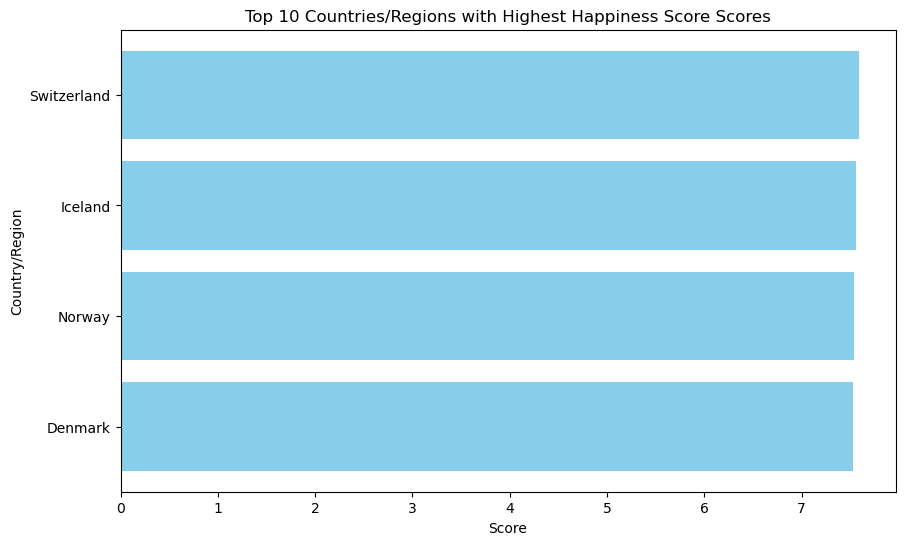

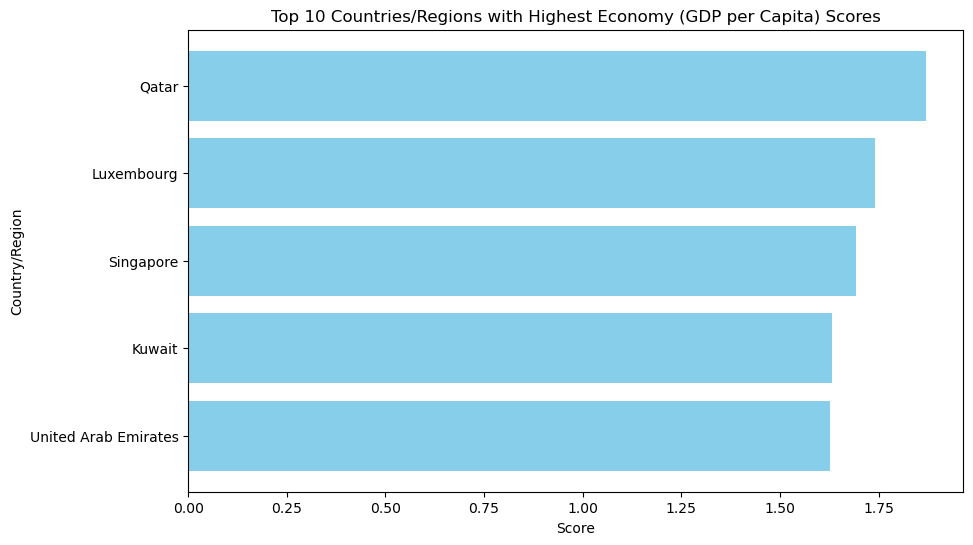

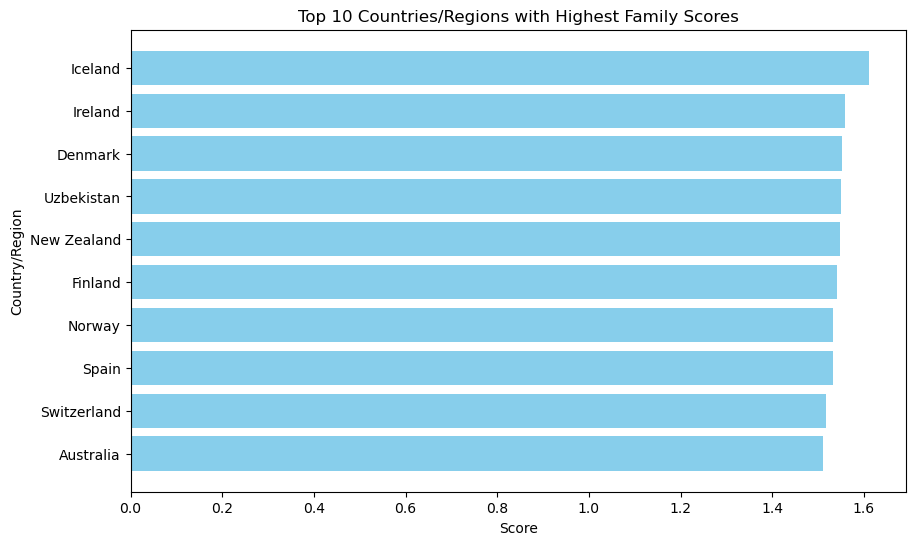

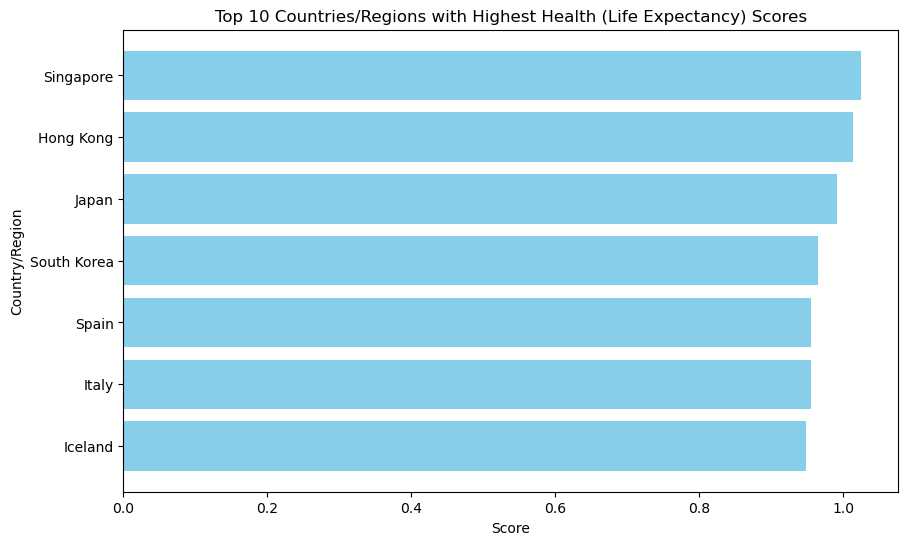

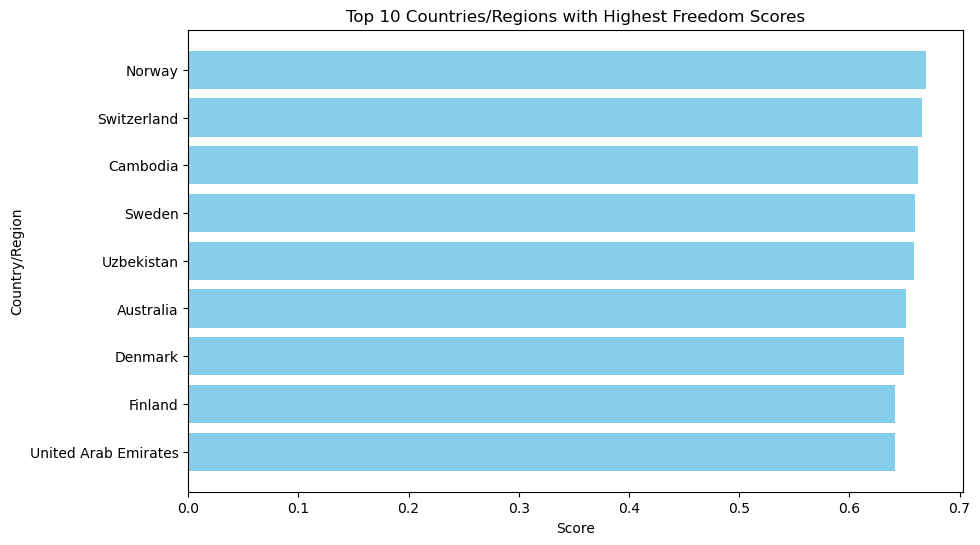

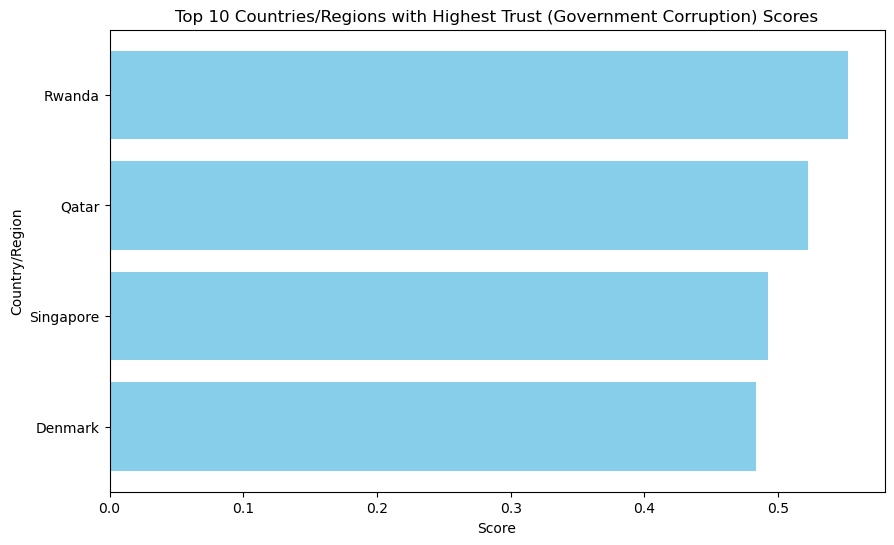

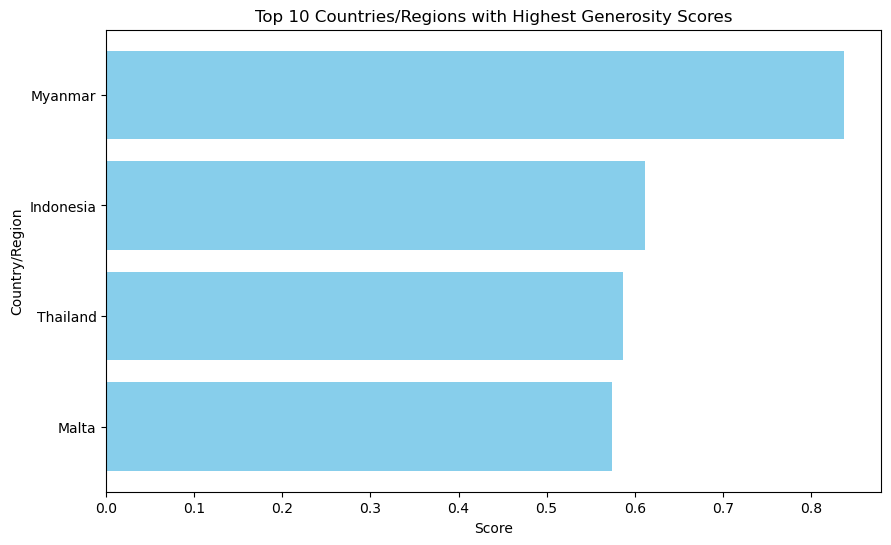

In [113]:
def plot_top_n(data, factor, n=10):
    top_n = data.nlargest(n, factor)
    plt.figure(figsize=(10, 6))
    plt.barh(top_n['Country'], top_n[factor], color='skyblue')
    plt.xlabel('Score')
    plt.ylabel('Country/Region')
    plt.title(f'Top {n} Countries/Regions with Highest {factor} Scores')
    plt.gca().invert_yaxis()  # Invert y-axis to have highest scores at the top
    plt.show()

# Overall Happiness
plot_top_n(df, 'Happiness Score')

# Factors Contributing to Happiness
factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

for factor in factors:
    plot_top_n(df, factor)

## A2

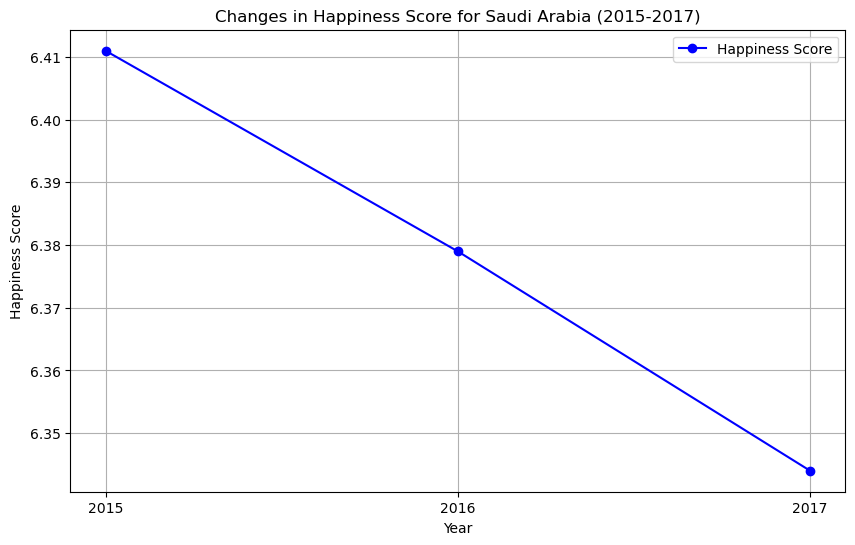

In [120]:

    country_data_2015 = df15[df15['Country'] == 'Saudi Arabia']
    country_data_2016 = df16[df16['Country'] == 'Saudi Arabia']
    country_data_2017 = df17[df17['Country'] == 'Saudi Arabia']
  
    plt.figure(figsize=(10, 6))
    plt.plot([2015, 2016, 2017], [country_data_2015['Happiness Score'].values[0], 
                                   country_data_2016['Happiness Score'].values[0],
                                   country_data_2017['Happiness Score'].values[0]],
             marker='o', linestyle='-', color='b', label='Happiness Score')
    
    plt.xlabel('Year')
    plt.ylabel('Happiness Score')
    plt.title('Changes in Happiness Score for Saudi Arabia (2015-2017)')
    plt.xticks([2015, 2016, 2017])
    plt.grid(True)
    plt.legend()
    plt.show()



# A3

In [123]:

merged_df = pd.merge(df15, df16, on='Country', suffixes=('_2015', '_2016'))
merged_df = pd.merge(merged_df, df17, on='Country')


merged_df['Change_15_16'] = merged_df['Happiness Score_2016'] - merged_df['Happiness Score_2015']
merged_df['Change_16_17'] = merged_df['Happiness Score'] - merged_df['Happiness Score_2016']


merged_df['Z_Score_15_16'] = zscore(merged_df['Change_15_16'])
merged_df['Z_Score_16_17'] = zscore(merged_df['Change_16_17'])

threshold = 3


significant_increase = merged_df[abs(merged_df['Z_Score_15_16']) > threshold]
significant_decrease = merged_df[abs(merged_df['Z_Score_15_16']) < -threshold]


print("Countries with significant increase in happiness (2015-2016):")
print(significant_increase[['Country', 'Change_15_16', 'Z_Score_15_16']])
print("\nCountries with significant decrease in happiness (2015-2016):")
print(significant_decrease[['Country', 'Change_15_16', 'Z_Score_15_16']])

Countries with significant increase in happiness (2015-2016):
       Country  Change_15_16  Z_Score_15_16
21   Venezuela        -0.726      -3.302672
64     Algeria         0.750       3.516915
106    Liberia        -0.949      -4.333002

Countries with significant decrease in happiness (2015-2016):
Empty DataFrame
Columns: [Country, Change_15_16, Z_Score_15_16]
Index: []
